In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [3]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
FinMaz = pd.read_csv('C:/Users/hp/FIN_DATA/FinMaz.csv')
FinMaz.head()

,Unnamed: 0,Zone,Year,PRECIP,TMPMAX,TMPMIN,RELHUM,WINDLY,SUNHRS,Irrg_Yes,Irrg_No,Seed_Improved,Seed_Not_Improved,Damage_Yes,Damage_No,Dreason_Crop_disease,Dreason_Frost,Dreason_Floods,Dreason_Locust,Dreason_Insects,Dreason_Toolittle_rain,Dreason_Toomuch_rain,Dreason_Wild_animals,Dreason_Birds,Dreason_Hail,Dreason_Weeds,Dreason_ShortageSeed,Dreason_DepletionSoil,Dreason_Security,Dreason_UseBadCrop,Dmeasure_Yes,Dmeasure_No,Dmtype_Chemical,Dmtype_NonChemical,Dmtype_Both,Dmchem_Insecticide,Dmchem_Herbicide,Dmchem_Fungicide,Dmchem_Insectcide_Her,Dmchem_Insectcide_Fun,Dmchem_Herbicide_Fung,Dmchem_All,Fert_Yes,Fert_No,Ferttype_Natural,Ferttype_Chemical,Ferttype_Both,D22a_Urea,D22a_DAP,D22a_Urea_DAP,D22a_NPS,D22a_Urea_NPS,D22a_Mixed,D23_Manure,D23_Compost,D23_Organic,D23_Manure_Compost,D23_Manure_Organic,D23_Compost_Organic,D23_All,Fweight,Area,Production,Yield
0,0,1,1997,69.269978,29.656865,14.336538,52.592245,1.698718,12.359170,0.0,72.0,0.0,72.0,22.0,48.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,71.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,50.0,16.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,13.0,1.0,0.0,1.0,0.0,0.0,0.0,10983.27,21084.00,296878.00,14.08
1,1,2,1997,57.647542,29.802796,19.996551,45.495155,1.698718,34.862082,14.0,1449.0,6.0,1457.0,880.0,582.0,31.0,7.0,10.0,37.0,223.0,343.0,37.0,8.0,60.0,79.0,9.0,0.0,21.0,0.0,15.0,1430.0,32.0,42.0,1303.0,85.0,20.0,14.0,0.0,4.0,0.0,0.0,0.0,1103.0,360.0,648.0,246.0,196.0,18.0,12.0,408.0,0.0,0.0,0.0,570.0,81.0,0.0,177.0,0.0,0.0,0.0,305751.82,18023.00,213105.00,11.82
2,2,3,1997,34.947796,24.863651,9.024471,57.551787,7.858578,12.400941,25.0,2474.0,27.0,2472.0,2129.0,370.0,3.0,3.0,4.0,2.0,764.0,1259.0,14.0,12.0,11.0,29.0,6.0,0.0,9.0,0.0,13.0,2465.0,34.0,7.0,2447.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1809.0,690.0,1110.0,401.0,297.0,58.0,128.0,510.0,0.0,0.0,0.0,978.0,255.0,0.0,156.0,0.0,0.0,0.0,348274.08,3069.00,25440.00,8.29
3,3,4,1997,60.206309,38.878724,26.824670,47.743268,10.645464,18.271932,0.0,74.0,0.0,74.0,1.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,1.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,22.0,43.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,29.0,10.0,0.0,4.0,0.0,0.0,0.0,6040.31,3128.00,45220.00,14.45
4,4,1,1998,78.737179,27.805128,18.107981,52.592245,1.575641,11.397638,2.0,921.0,10.0,913.0,517.0,406.0,17.0,13.0,5.0,23.0,109.0,199.0,3.0,4.0,12.0,88.0,14.0,0.0,12.0,0.0,18.0,914.0,9.0,1.0,912.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,848.0,75.0,701.0,57.0,90.0,9.0,18.0,119.0,0.0,0.0,0.0,720.0,3.0,0.0,35.0,3.0,0.0,14.0,141910.34,17063.93,320066.85,18.76


In [5]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(FinMaz, FinMaz.Production,
                                                    test_size=0.2,
                                                    random_state=0) # we are setting the seed here
X_train.shape, X_test.shape

((41, 64), (11, 64))

In [6]:
for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Fweight', 'Area', 'Production', 'Yield']:
    X_train[var] = np.log(X_train[var])
    X_test[var]= np.log(X_test[var])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# check that test set does not contain null values in the engineered variables
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production', 'Yield'] if X_test[var].isnull().sum()>0]

[]

In [8]:
# same for train set
[var for var in ['PRECIP', 'TMPMAX', 'TMPMIN', 'RELHUM', 'WINDLY', 'SUNHRS', 'Seed_Not_Improved', 'Damage_Yes', 'Dmeasure_Yes', 'Dmtype_NonChemical', 'Fert_Yes', 'Fert_No', 'Ferttype_Natural', 'Ferttype_Chemical', 'D23_Manure', 'Fweight', 'Area', 'Production', 'Yield'] if X_train[var].isnull().sum()>0]

[]

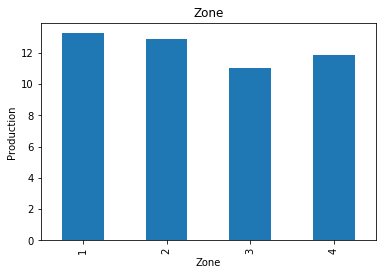

In [9]:
# let me show you what I mean by monotonic relationship between labels and target
def analyse_vars(df, var):
    df = df.copy()
    df.groupby(var)['Production'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Production')
    plt.show()
    

analyse_vars(X_train, 'Zone')

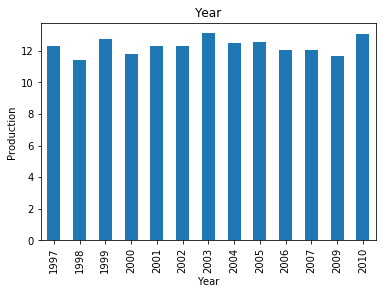

In [10]:
analyse_vars(X_train, 'Year')

In [11]:
train_vars = [var for var in X_train.columns if var not in ['Year', 'Production']]
len(train_vars)

62

In [12]:
X_train['Production'].reset_index(drop=True)

0     11.066939
1     12.054022
2     12.965013
3     11.016614
4     12.075543
5     10.665465
6     10.409383
7     12.971589
8     11.654079
9     11.066939
10    13.632668
11    12.126504
12    11.025413
13    12.438328
14    11.694777
15    13.261114
16    12.464045
17    13.261114
18    13.135497
19    13.036294
20    12.601409
21    13.108809
22    12.877319
23    10.645081
24    12.929060
25    12.269540
26    12.889177
27    11.255743
28    13.339251
29    11.396764
30    11.742491
31    13.539271
32    12.877319
33    11.742491
34    12.404861
35    12.038885
36    13.914904
37    10.719295
38    12.601077
39    12.108178
40    11.273571
Name: Production, dtype: float64

In [13]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([X_train[['Production']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([X_test[['Production']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X_test[train_vars]), columns=train_vars)],
                    axis=1)

In [14]:
X_train.isnull().sum()

Production                0
Unnamed: 0                0
Zone                      0
PRECIP                    0
TMPMAX                    0
TMPMIN                    0
RELHUM                    0
WINDLY                    0
SUNHRS                    0
Irrg_Yes                  0
Irrg_No                   0
Seed_Improved             0
Seed_Not_Improved         0
Damage_Yes                0
Damage_No                 0
Dreason_Crop_disease      0
Dreason_Frost             0
Dreason_Floods            0
Dreason_Locust            0
Dreason_Insects           0
Dreason_Toolittle_rain    0
Dreason_Toomuch_rain      0
Dreason_Wild_animals      0
Dreason_Birds             0
Dreason_Hail              0
Dreason_Weeds             0
Dreason_ShortageSeed      0
Dreason_DepletionSoil     0
Dreason_Security          0
Dreason_UseBadCrop        0
                         ..
Dmtype_NonChemical        0
Dmtype_Both               0
Dmchem_Insecticide        0
Dmchem_Herbicide          0
Dmchem_Fungicide    

In [15]:
# capture the target
y_train = X_train['Production']
y_test = X_test['Production']

# drop unnecessary variables from our training and testing sets
X_train.drop(['Production'], axis=1, inplace=True)
X_test.drop(['Production'], axis=1, inplace=True)

In [16]:
X_train = X_train.iloc[:, 1:]

In [17]:
X_test = X_test.iloc[:, 1:]

In [18]:
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [19]:
# this command let's us visualise those features that were kept.
# Kept features have a True indicator
sel_.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True])

In [20]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 61
selected features: 15
features with coefficients shrank to zero: 46


In [21]:
# print the selected features
selected_feat

Index(['RELHUM', 'Dreason_Toomuch_rain', 'Dreason_Hail',
       'Dreason_ShortageSeed', 'Dmtype_Chemical', 'Dmchem_Herbicide',
       'Dmchem_Fungicide', 'Dmchem_Insectcide_Her', 'Dmchem_All', 'D22a_NPS',
       'D22a_Urea_NPS', 'D23_Compost', 'Fweight', 'Area', 'Yield'],
      dtype='object')

In [22]:
# this is an alternative way of identifying the selected features 
# based on the non-zero regularisation coefficients:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['RELHUM', 'Dreason_Toomuch_rain', 'Dreason_Hail',
       'Dreason_ShortageSeed', 'Dmtype_Chemical', 'Dmchem_Herbicide',
       'Dmchem_Fungicide', 'Dmchem_Insectcide_Her', 'Dmchem_All', 'D22a_NPS',
       'D22a_Urea_NPS', 'D23_Compost', 'Fweight', 'Area', 'Yield'],
      dtype='object')

In [23]:
pd.Series(selected_feats).to_csv('C:/Users/hp/FIN_DATA/selected_featuresMaz.csv', index=False)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [24]:
# load selected features
# we selected the features in the previous lecture / notebook
# if you haven't done so, go ahead and visit the previous lecture to find out how to select
# the features

features = pd.read_csv('C:/Users/hp/FIN_DATA/selected_featuresMaz.csv', header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,
# because it needs key feature engineering steps that I want to discuss further during the deployment
# part of the course. 

features = features + ['Irrg_No'] 

features

['RELHUM',
 'Dreason_Toomuch_rain',
 'Dreason_Hail',
 'Dreason_ShortageSeed',
 'Dmtype_Chemical',
 'Dmchem_Herbicide',
 'Dmchem_Fungicide',
 'Dmchem_Insectcide_Her',
 'Dmchem_All',
 'D22a_NPS',
 'D22a_Urea_NPS',
 'D23_Compost',
 'Fweight',
 'Area',
 'Yield',
 'Irrg_No']

In [25]:

# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

In [26]:
# train the model
lin_model = Lasso(alpha=0.005, random_state=0) # remember to set the random_state / seed
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
# evaluate the model:
# remember that we log transformed the output  in our feature engineering notebook / lecture.

# In order to get the true performance of the Lasso
# we need to transform both the target and the predictions
# back to the original agriculture values.

# We will evaluate performance using the mean squared error and the
# root of the mean squared error

pred = lin_model.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print()
pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print()
print('Average house price: ', np.exp(y_train).median())

linear train mse: 1554798093.8528557
linear train rmse: 39430.928138364376

linear test mse: 15625856972.92097
linear test rmse: 125003.4278446834

Average house price:  213104.99999999988


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

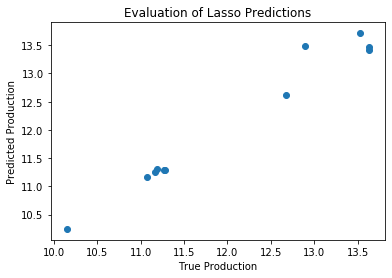

In [28]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True Production')
plt.ylabel('Predicted Production')
plt.title('Evaluation of Lasso Predictions')

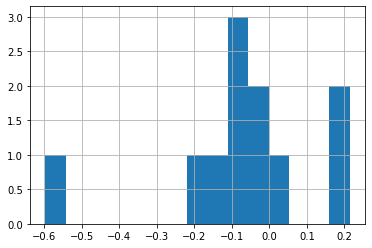

In [29]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

Text(0.5, 1.0, 'Feature Importance')

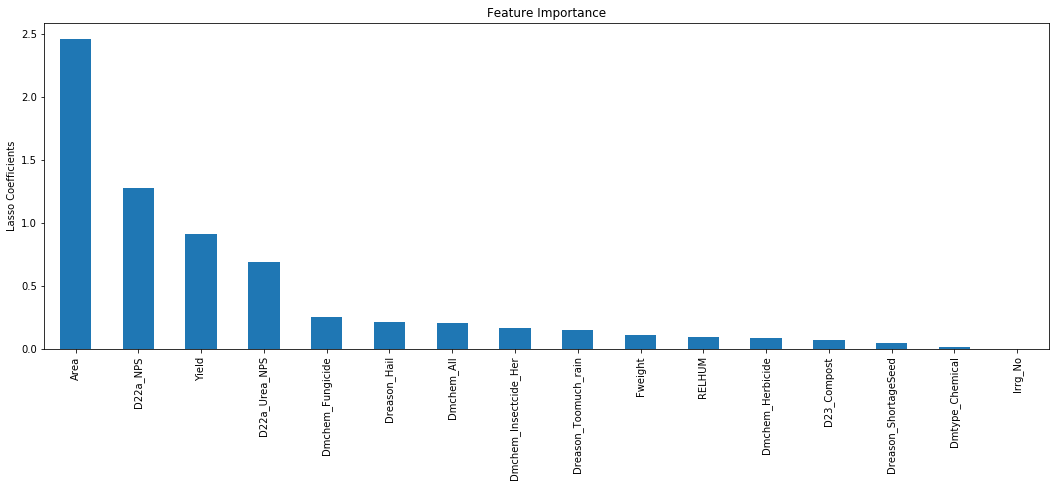

In [30]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')